# Kaggle - House Prices - Advanced Regression Techniques

## Data Cleaning - Simple

#### import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from scipy import stats
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [2]:
suffix = "agg"

#### read train and test sets

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

#### store both dfs lengths

In [4]:
m_train = df_train.shape[0]
m_test = df_test.shape[0]
m_train, m_test

(1460, 1459)

#### concat the dfs

In [5]:
df = pd.concat([df_train, df_test])
assert df.shape[0] == m_train + m_test

#### see df head

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# drop Id and SalePrice

In [7]:
df.drop(["Id"], axis=1, inplace=True)

In [8]:
target_col = "SalePrice"
target = df[target_col]
df.drop([target_col], axis=1, inplace=True)

#### view dtypes and missing values

In [9]:
# df.info()

In [10]:
df.isnull().sum()[df.isnull().sum() > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

#### show column names

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# fix cols dtypes

In [12]:
num_object_to = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
                 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold']
df[num_object_to] = df[num_object_to].astype(object)

#### inspect columns. Store input features

In [13]:
cols_to_drop = []

##### 0. MSSubClass: Identifies the type of dwelling involved in the sale.

In [14]:
col = "MSSubClass"
df[col].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

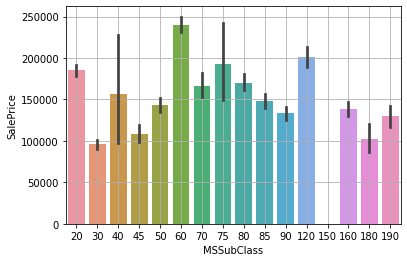

In [15]:
sns.barplot(x=df[col], y=target)
plt.grid()

##### 1. MSZoning: Identifies the general zoning classification of the sale.

In [16]:
col = "MSZoning"
df[col].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

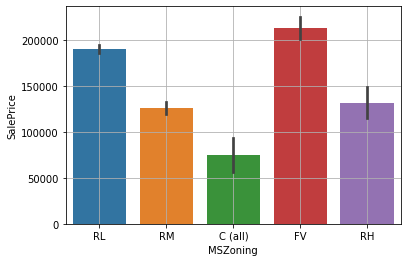

In [17]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 2. LotFrontage: Linear feet of street connected to property

In [18]:
col = "LotFrontage"
df[col].corr(target)

0.35179909657067804

In [19]:
# sns.scatterplot(x=col, y="SalePrice", data=df)

In [20]:
np.sum(df[col].isnull())

486

In [21]:
filter = df[col].isnull()
df.loc[filter, col] = 0
temp = df[col].values.reshape(-1, 1)

#### 3. LotArea: Lot size in square feet

In [22]:
col = "LotArea"
df[col].corr(target)

0.2638433538714056

In [23]:
# sns.scatterplot(x=col, y="SalePrice", data=df)

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

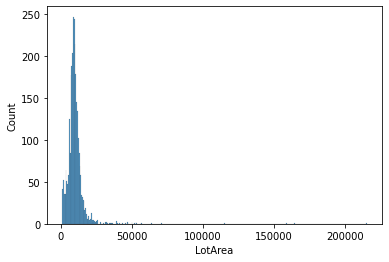

In [24]:
sns.histplot(df[col])

In [25]:
np.sum(df["LotArea"].isnull())

0

#### 4. Street: Type of road access to property

In [26]:
col = "Street"
df[col].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

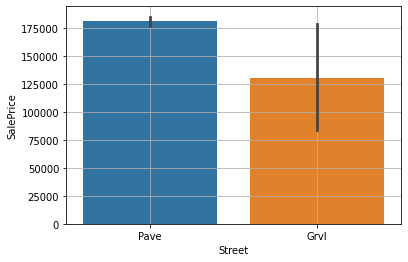

In [27]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [28]:
cols_to_drop.append(col)

#### 5. Alley: Type of alley access to property

In [29]:
col = "Alley"
df[col].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

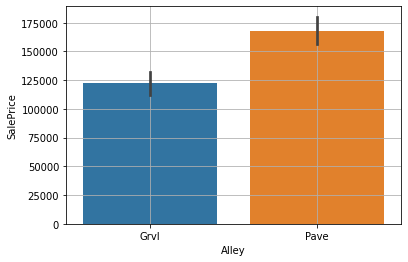

In [30]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [31]:
np.sum(df[col].isnull())

2721

In [32]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

#### 6. LotShape: General shape of property

In [33]:
col = "LotShape"
df[col].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

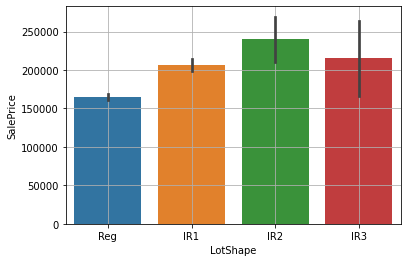

In [34]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [35]:
np.sum(df[col].isnull())

0

#### 7. LandContour: Flatness of the property

In [36]:
col = "LandContour"
df[col].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

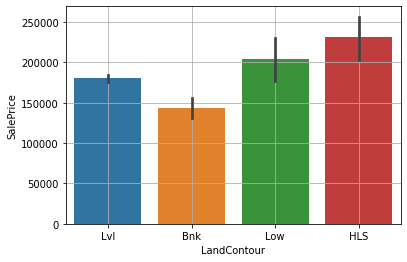

In [37]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [38]:
np.sum(df[col].isnull())

0

#### 8. Utilities: Type of utilities available

In [39]:
col = "Utilities"
df[col].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

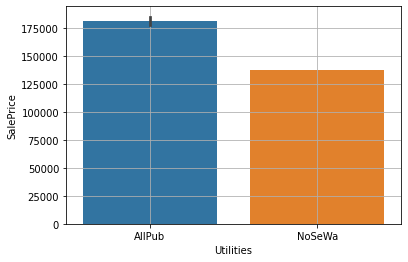

In [40]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [41]:
cols_to_drop.append(col)

#### 9. LotConfig: Lot configuration

In [42]:
col = "LotConfig"
df[col].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

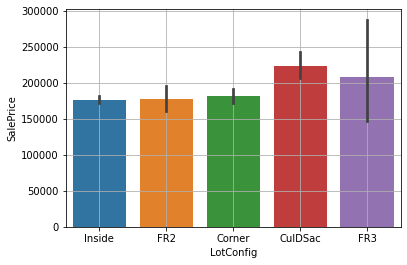

In [43]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [44]:
filter_high = df[col] == "CulDSac"
df.loc[~filter_high, col] = "non-CullDSac"

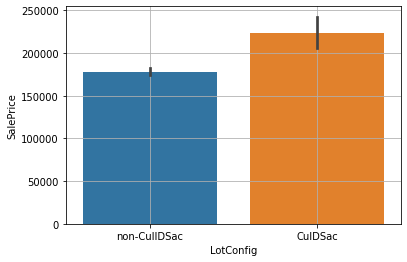

In [45]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [46]:
np.sum(df[col].isnull())

0

#### 10. LandSlope: Slope of property

In [47]:
col = "LandSlope"
df[col].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

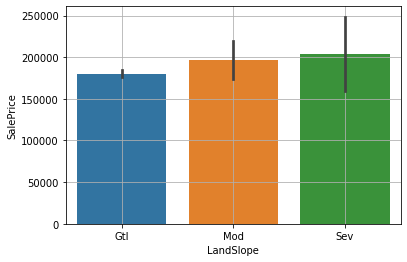

In [48]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 11. Neighborhood: Physical locations within Ames city limits

In [49]:
col = "Neighborhood"
df[col].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

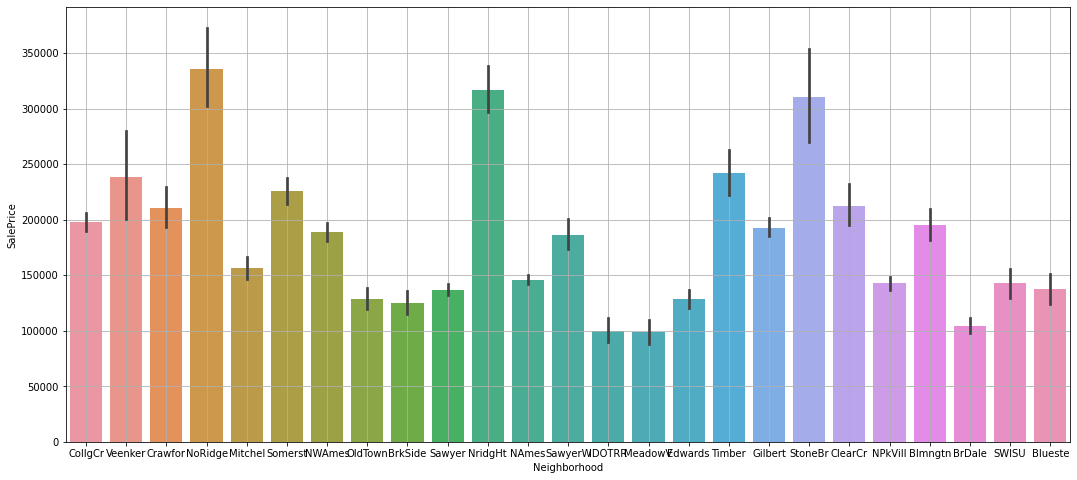

In [50]:
plt.figure(figsize=(18, 8))
sns.barplot(x=df[col], y=target)
plt.grid()

In [51]:
col_dict = {
    "high": ["NoRidge", "NridgHt", "StoneBr"],
    "mid_high" : ["Veenker", "Somerst", "Timber"],
    "mid": ["Crawfor", "CollgCr", "NWAmes", "SawyerW", "Gilbert", "ClearCr", "Blmngtn"],
    "mid_low": ["Mitchel", "NAmes", "NPkVill", "SWISU", "Blueste", "Edwards", "OldTown", "BrkSide", "Sawyer"],
    "low": ["IDOTRR", "MeadowV", "BrDale"]
}
len_cols = 0
for key, value in col_dict.items():
    len_cols += len(value)
assert(len_cols == len(df[col].unique()))


In [52]:
for key, value in col_dict.items():
    _filter = df[col].isin(value)
    df.loc[_filter, col] = key

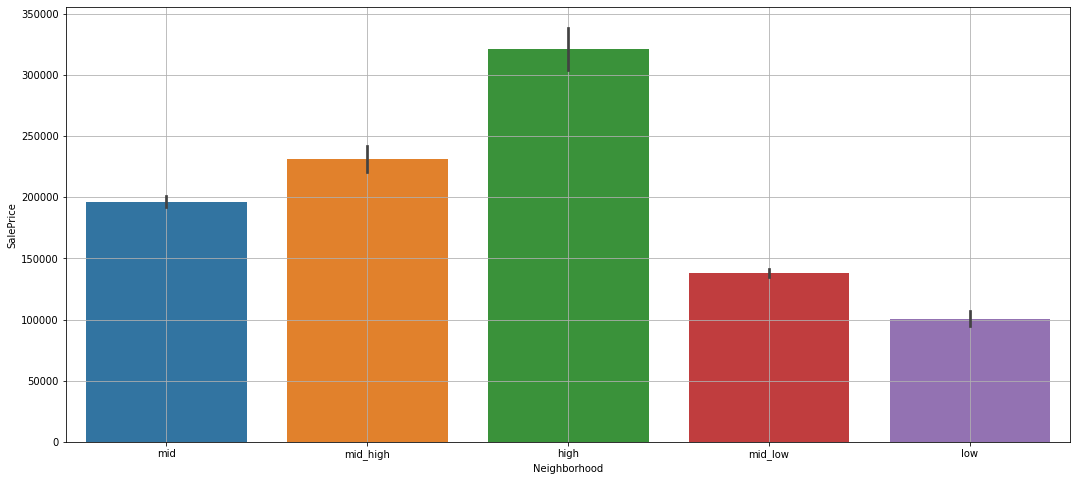

In [53]:
plt.figure(figsize=(18, 8))
sns.barplot(x=df[col], y=target)
plt.grid()

#### 12. Condition1: Proximity to various conditions

In [54]:
col = "Condition1"
df[col].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

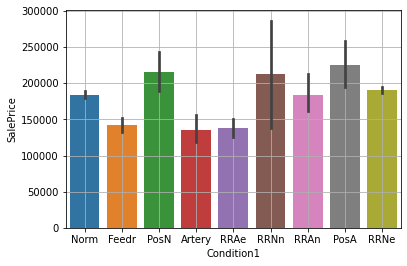

In [55]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 13. Condition2: Proximity to various conditions (if more than one is present)

In [56]:
col = "Condition2"
df[col].value_counts()

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

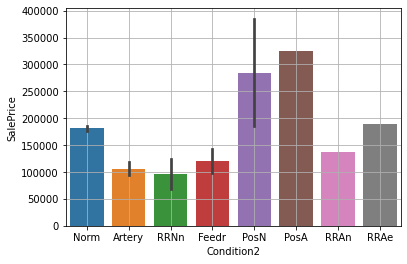

In [57]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 14. BldgType: Type of dwelling

In [58]:
col = "BldgType"
df[col].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

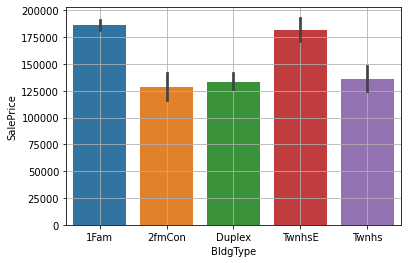

In [59]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [60]:
filter_low = df[col].isin(["2FmCon", "TwnhsI", "Duplex"])
filter_high = ~filter_low
df.loc[filter_low, col] = "low"
df.loc[filter_high, col] = "high"

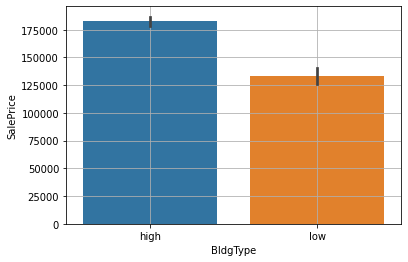

In [61]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [62]:
df[col].isna().sum()

0

#### 15. HouseStyle: Style of dwelling

In [63]:
col = "HouseStyle"
df[col].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

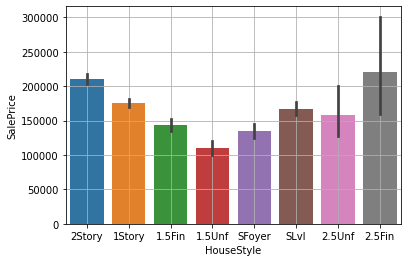

In [64]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [65]:
filter_high = df[col].isin(["2Story", "2.5Fin"])
filter_med = df[col].isin(["1Story", "SLvl", "2.5Unf"])
filter_mid_low = df[col].isin(["1.5Fin", "SFoyer"])
filter_low = ~(filter_high | filter_med | filter_mid_low)
df.loc[filter_high, col] = "high"
df.loc[filter_med, col] = "med"
df.loc[filter_mid_low, col] = "mid_low"
df.loc[filter_low, col] = "low"

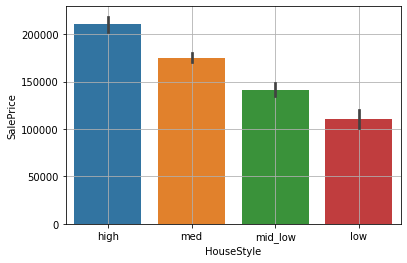

In [66]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [67]:
np.sum(df[col].isnull())

0

#### 16. OverallQual: Rates the overall material and finish of the house

In [68]:
col = "OverallQual"
df[col].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

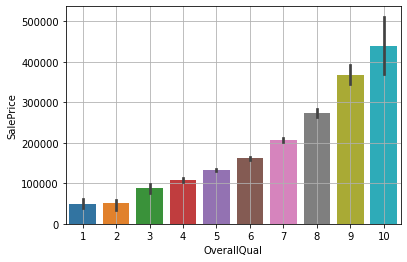

In [69]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [70]:
np.sum(df[col].isnull())

0

#### 17. OverallCond: Rates the overall condition of the house

In [71]:
col = "OverallCond"
df[col].value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

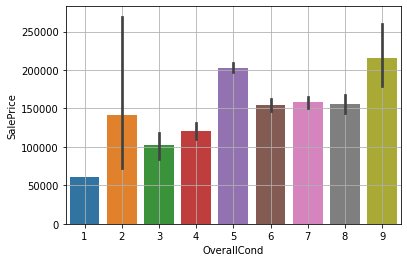

In [72]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [73]:
cols_to_drop.append(col)

#### 18. YearBuilt: Original construction date

In [74]:
col_built = "YearBuilt"
df[col_built].isna().sum()

0

In [75]:
col_remodeled = "YearRemodAdd"
df[col_remodeled].isna().sum()

0

In [76]:
col_sold = "YrSold"
df[col_sold].isna().sum()

0

#### 20. RoofStyle: Type of roof

In [77]:
col = "RoofStyle"
df[col].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

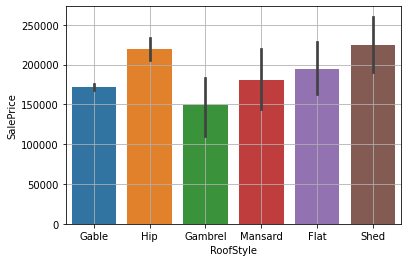

In [78]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [79]:
filter_high = df[col].isin(["Hip", "Shed"])
filter_mid_low = df[col].isin(["Gable", "Mansard"])
df.loc[filter_high, col] = "high"
df.loc[filter_mid_low, col] = "mid_low"

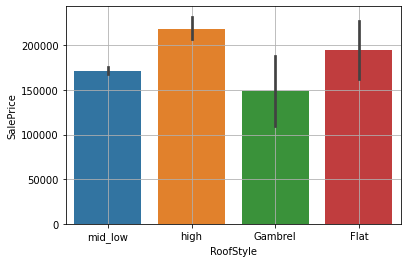

In [80]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [81]:
np.sum(df[col].isnull())

0

#### 21. RoofMatl: Roof material

In [82]:
col = "RoofMatl"
df[col].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

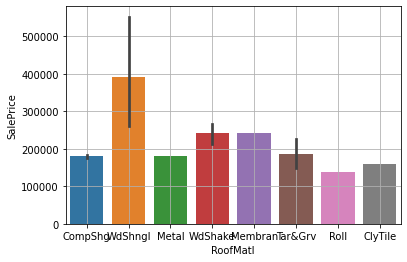

In [83]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [84]:
cols_to_drop.append(col)

#### 22. Exterior1st: Exterior covering on house

In [85]:
col = "Exterior1st"
df[col].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

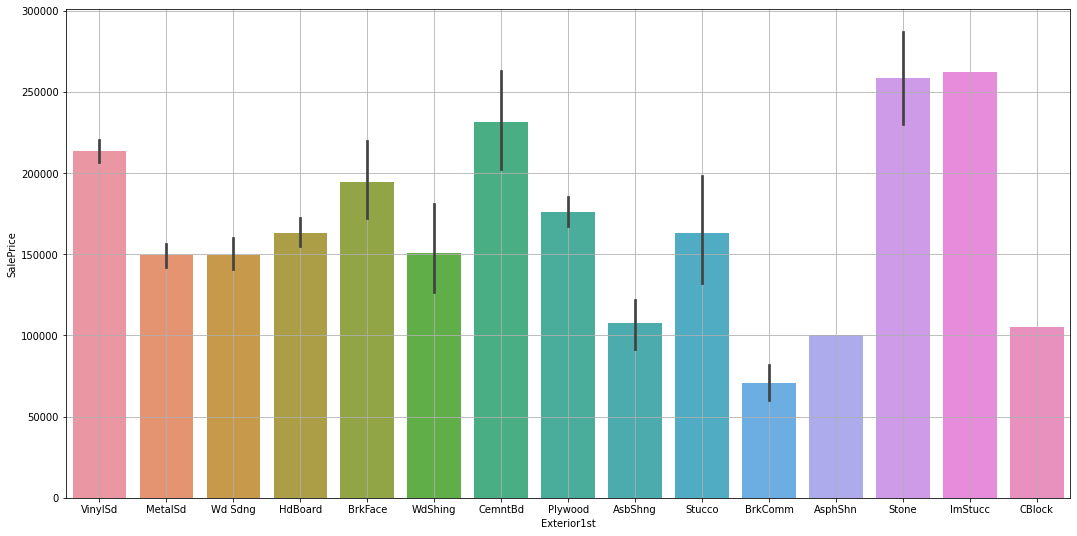

In [86]:
plt.figure(figsize=(18, 9))
sns.barplot(x=df[col], y=target)
plt.grid()

In [87]:
filter_few = df[col].isin(["BrkComm", "AsphShn", "CBlock", "Stone", "ImStucc", "Stucco"])
df.loc[filter_few, col] = "few"

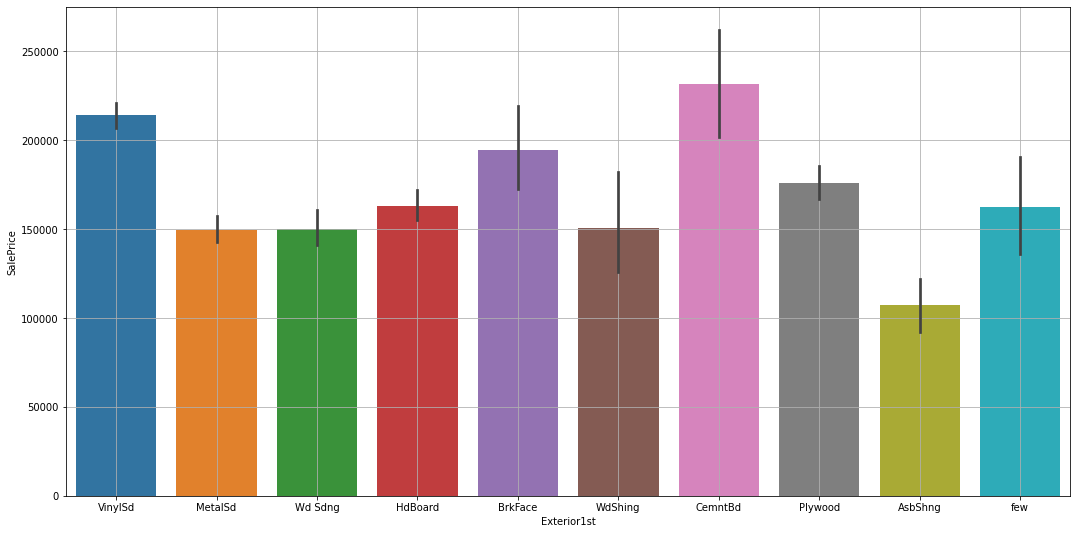

In [88]:
plt.figure(figsize=(18, 9))
sns.barplot(x=df[col], y=target)
plt.grid()

In [89]:
filter_1 = df[col].isin(["MetalSd", "Wd Sdng", "WdShing"])
filter_2 = df[col].isin(["HdBoard", "Stucco"])
df.loc[filter_1, col] = '1'
df.loc[filter_2, col] = '2'

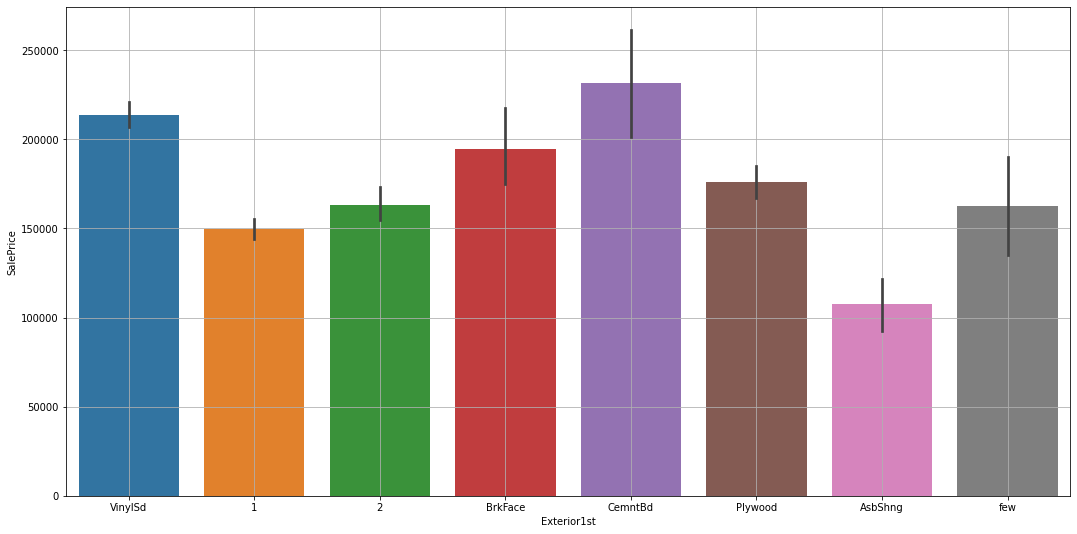

In [90]:
plt.figure(figsize=(18, 9))
sns.barplot(x=df[col], y=target)
plt.grid()

In [91]:
filter = df[col].isnull()
df.loc[filter]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,30,RL,85.0,19550,Pave,NA,Reg,Lvl,AllPub,non-CullDSac,Gtl,mid_low,Norm,Norm,high,med,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [92]:
df.loc[filter, col] = "few"
np.sum(df[col].isnull())

0

#### 23. Exterior2nd: Exterior covering on house (if more than one material)

In [93]:
col = "Exterior2nd"
df[col].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

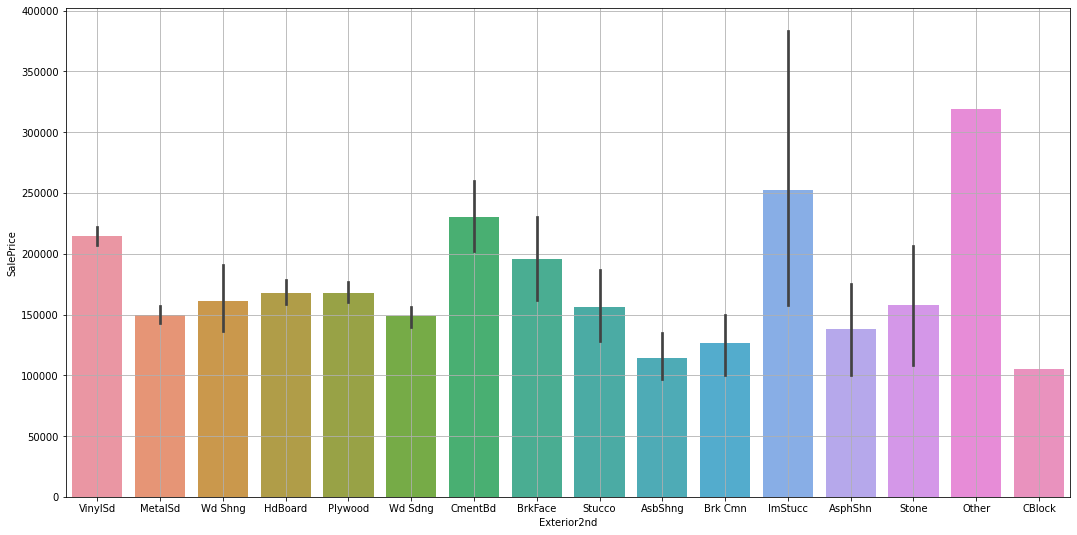

In [94]:
plt.figure(figsize=(18, 9))
sns.barplot(x=df[col], y=target)
plt.grid()

In [95]:
cols_to_drop.append(col)

#### 24. MasVnrType: Masonry veneer type

In [96]:
col = "MasVnrType"
df[col].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

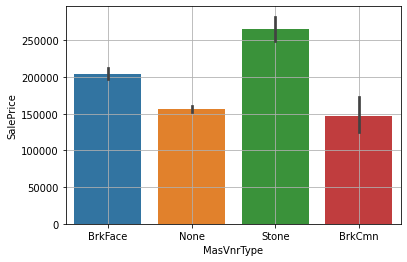

In [97]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [98]:
df.loc[df[col] == "BrkCmn", col] = "None"

In [99]:
np.sum(df[col].isnull())

24

In [100]:
# filter = df[col].isnull()
# df.loc[filter]

In [101]:
df[col] = df[col].fillna("None")
np.sum(df[col].isnull())

0

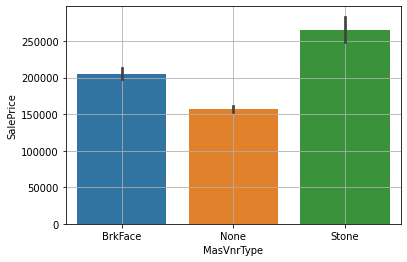

In [102]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 25. MasVnrArea: Masonry veneer area in square feet

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

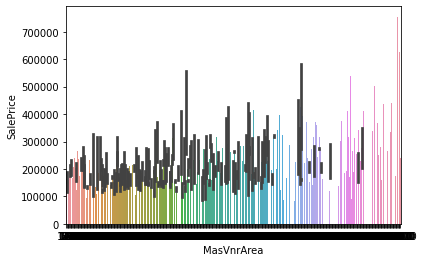

In [103]:
col = "MasVnrArea"
sns.barplot(x=df[col], y=target)

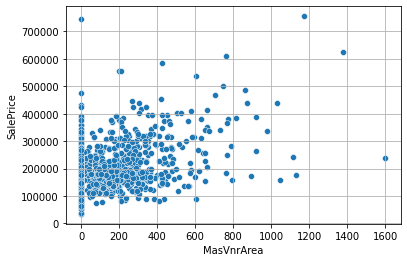

In [104]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [105]:
np.sum(df[col].isnull())

23

In [106]:
df[col] = df[col].fillna(0)
np.sum(df[col].isnull())

0

#### 26. ExterQual: Evaluates the quality of the material on the exterior 

In [107]:
col = "ExterQual"
df[col].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

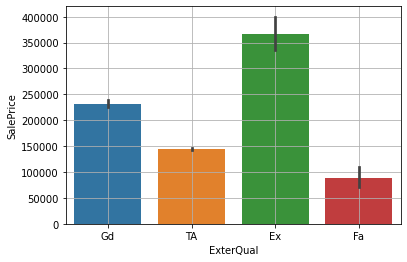

In [108]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [109]:
np.sum(df[col].isnull())

0

#### 27. ExterCond: Evaluates the present condition of the material on the exterior

In [110]:
col = "ExterCond"
df[col].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

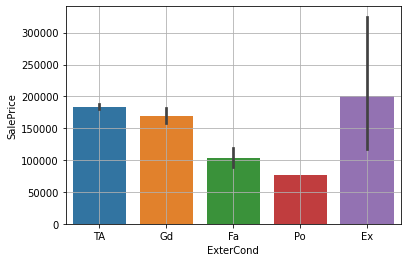

In [111]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [112]:
np.sum(df[col].isnull())

0

#### 28. Foundation: Type of foundation

In [113]:
col = "Foundation"
df[col].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

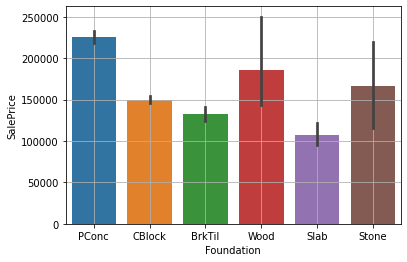

In [114]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [115]:
filter_mid = df[col].isin(["Stone", "Wood"])
df.loc[filter_mid, col] = "mid"

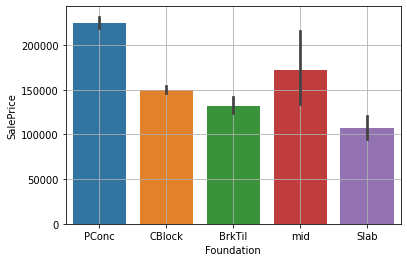

In [116]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [117]:
np.sum(df[col].isnull())

0

#### 29. BsmtQual: Evaluates the height of the basement

In [118]:
col = "BsmtQual"
df[col].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

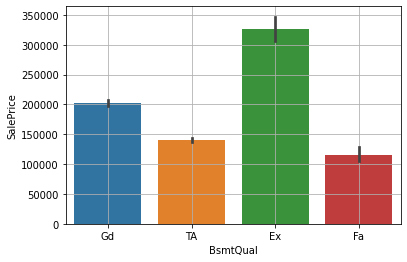

In [119]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [120]:
np.sum(df[col].isnull())

81

In [121]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

#### 30. BsmtCond: Evaluates the general condition of the basement

In [122]:
col = "BsmtCond"
df[col].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

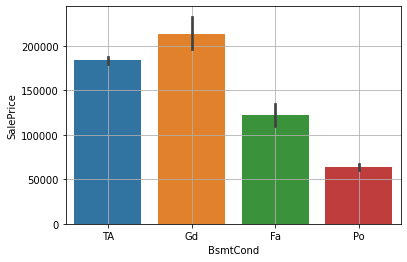

In [123]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [124]:
np.sum(df[col].isnull())

82

In [125]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

#### 31. BsmtExposure: Refers to walkout or garden level walls

In [126]:
col = "BsmtExposure"
df[col].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

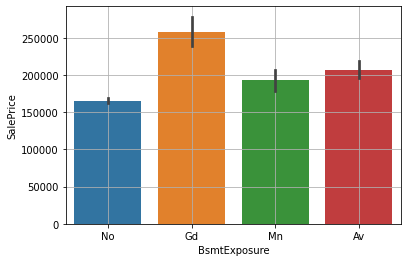

In [127]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [128]:
np.sum(df[col].isnull())

82

In [129]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

#### 32. BsmtFinType1: Rating of basement finished area

In [130]:
col = "BsmtFinType1"
df[col].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

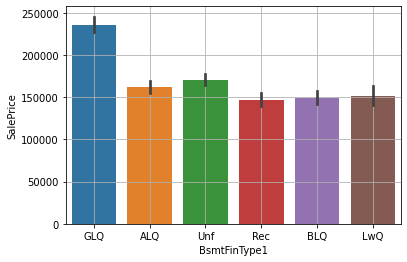

In [131]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [132]:
filter_low = df[col].isin(["Rec", "BLQ", "LwQ"])
df.loc[filter_low, col] = "low"

In [133]:
np.sum(df[col].isnull())

79

In [134]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

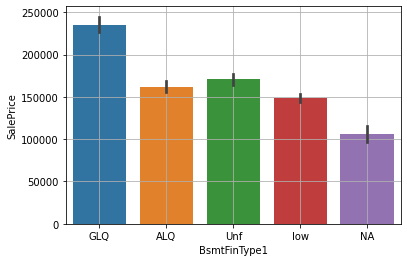

In [135]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 33. BsmtFinSF1: Type 1 finished square feet

In [136]:
col = "BsmtFinSF1"
df[col].corr(target)

0.3864198062421532

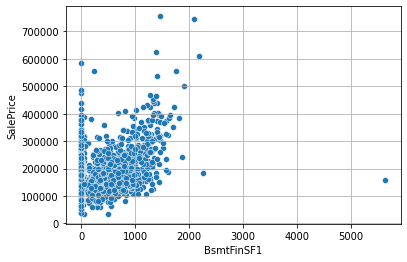

In [137]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [138]:
np.sum(df[col].isnull())

1

In [139]:
df.loc[df[col].isnull(), col] = 0
np.sum(df[col].isnull())

0

#### 34. BsmtFinType2: Rating of basement finished area (if multiple types)

In [140]:
col = "BsmtFinType2"
df[col].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

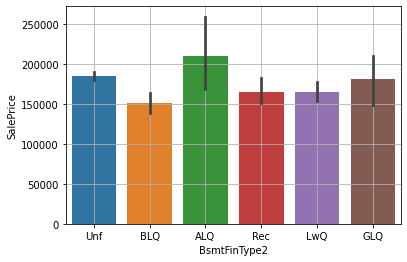

In [141]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [142]:
np.sum(df[col].isnull())

80

In [143]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

In [144]:
filter_1 = df[col].isin(["Rec", "LwQ"])
filter_2 = df[col].isin(["Unf", "GLQ"])
df.loc[filter_1, col] = "1"
df.loc[filter_2, col] = "2"

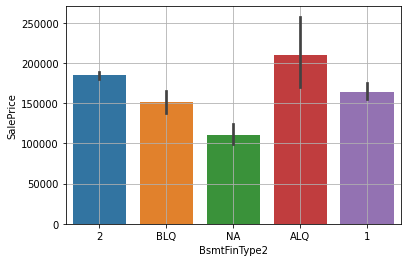

In [145]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 35. BsmtFinSF2: Type 2 finished square feet

In [146]:
col = "BsmtFinSF2"
df[col].corr(target)

-0.011378121450215125

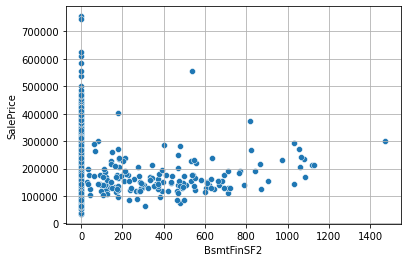

In [147]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [148]:
cols_to_drop.append(col)

#### 36. BsmtUnfSF: Unfinished square feet of basement area

In [149]:
col = "BsmtUnfSF"
df[col].corr(target)

0.21447910554696892

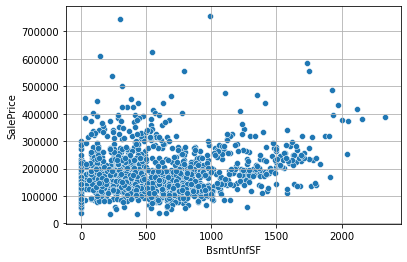

In [150]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [151]:
np.sum(df[col].isnull())

1

In [152]:
df[col] = df[col].fillna(0)
np.sum(df[col].isnull())

0

#### 37. TotalBsmtSF: Total square feet of basement area

In [153]:
col = "TotalBsmtSF"
df[col].corr(target)

0.6135805515591956

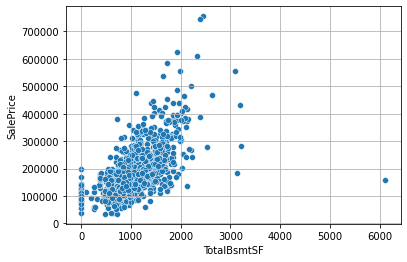

In [154]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [155]:
np.sum(df[col].isnull())

1

In [156]:
df[col] = df[col].fillna(0)
np.sum(df[col].isnull())

0

#### 38. Heating: Type of heating

In [157]:
col = "Heating"
df[col].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

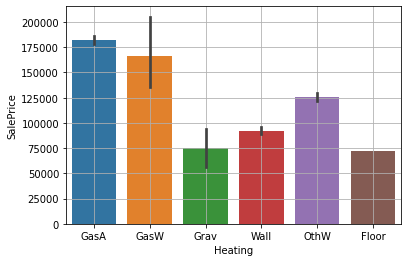

In [158]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 39. HeatingQC: Heating quality and condition

In [159]:
col = "HeatingQC"
df[col].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

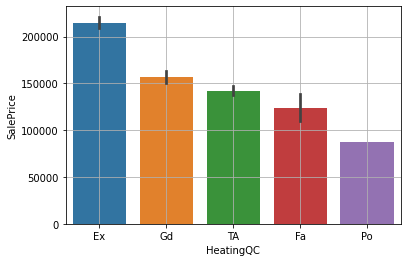

In [160]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [161]:
np.sum(df[col].isnull())

0

#### 40. CentralAir: Central air conditioning

In [162]:
col = "CentralAir"
df[col].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

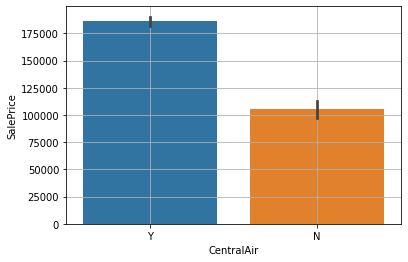

In [163]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [164]:
np.sum(df[col].isnull())

0

#### 41. Electrical: Electrical system

In [165]:
col = "Electrical"
df[col].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

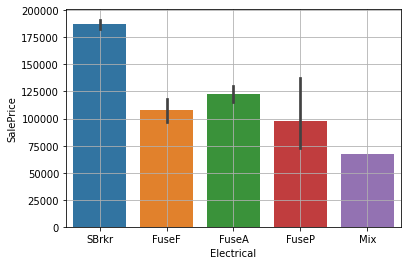

In [166]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [167]:
filter_few = df[col].isin(["FuseP", "Mix"])
df.loc[filter_few, col] = "few"

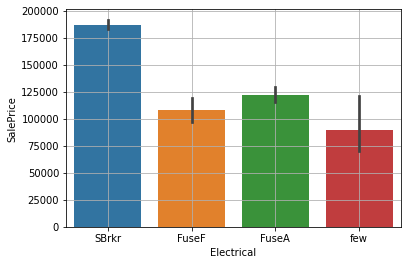

In [168]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [169]:
np.sum(df[col].isnull())

1

In [170]:
df[col] = df[col].fillna(df[col].mode()[0])
np.sum(df[col].isnull())

0

#### 42. 1stFlrSF: First Floor square feet

In [171]:
col = "1stFlrSF"
df[col].corr(target)

0.6058521846919147

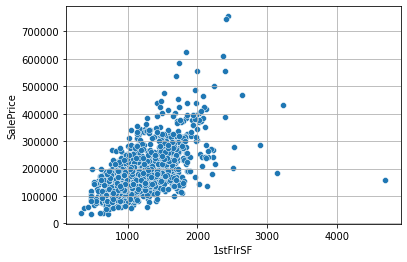

In [172]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [173]:
np.sum(df[col].isnull())

0

#### 43. 2ndFlrSF: Second floor square feet

In [174]:
col = "2ndFlrSF"
df[col].corr(target)

0.3193338028320681

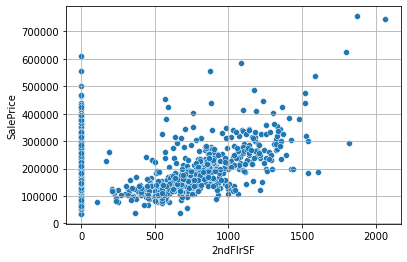

In [175]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [176]:
np.sum(df[col].isnull())

0

#### 44. LowQualFinSF: Low quality finished square feet (all floors)

In [177]:
col = "LowQualFinSF"
df[col].corr(target)

-0.02560613000067959

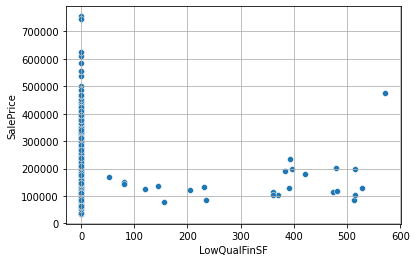

In [178]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [179]:
cols_to_drop.append(col)

#### 45. GrLivArea: Above grade (ground) living area square feet

In [180]:
col = "GrLivArea"
df[col].corr(target)

0.7086244776126523

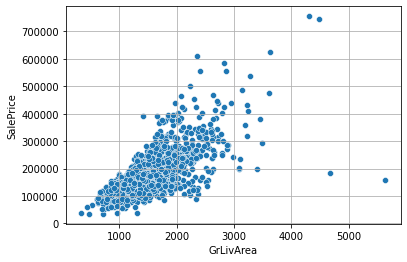

In [181]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [182]:
df[col].isna().sum()

0

#### 46. BsmtFullBath: Basement full bathrooms

In [183]:
col = "BsmtFullBath"
df[col].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [184]:
df[col].isnull().sum()

2

In [185]:
df[col] = df[col].fillna(0.)
np.sum(df[col].isnull())

0

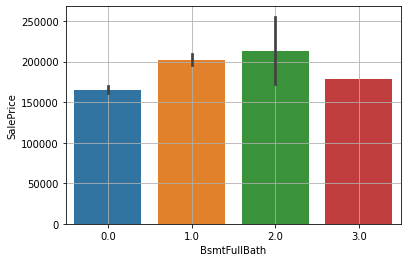

In [186]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [187]:
filter_few = df[col].isin(["2.0", "3.0"])
df.loc[filter_few, col] = "2.0"

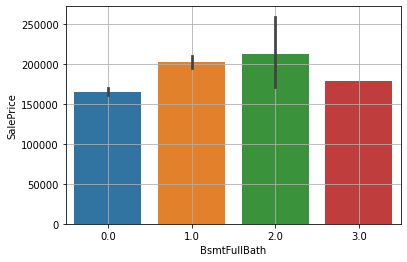

In [188]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 47. BsmtHalfBath: Basement half bathrooms

In [189]:
col = "BsmtHalfBath"
df[col].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

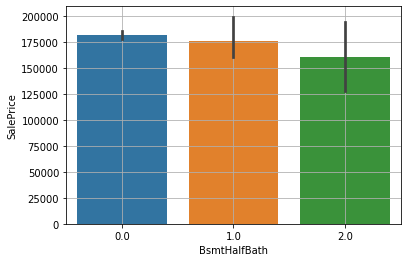

In [190]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [191]:
cols_to_drop.append(col)

#### 48. FullBath: Full bathrooms above grade

In [192]:
col = "FullBath"
df[col].value_counts()

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

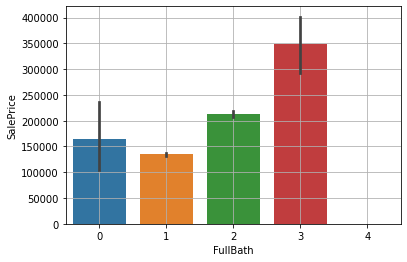

In [193]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [194]:
np.sum(df[col].isnull())

0

#### 49. HalfBath: Half baths above grade

In [195]:
col = "HalfBath"
df[col].value_counts()

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

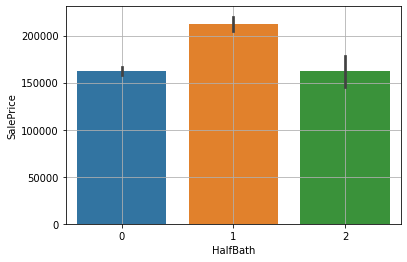

In [196]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [197]:
np.sum(df[col].isnull())

0

#### 50. BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

In [198]:
col = "BedroomAbvGr"
df[col].value_counts()

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

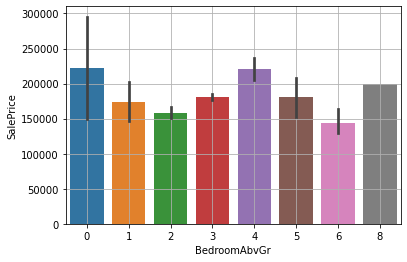

In [199]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [200]:
cols_to_drop.append(col)

#### 50.5. KitchenAbvGr: Kitchens above grade

In [201]:
col = "KitchenAbvGr"
df[col].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

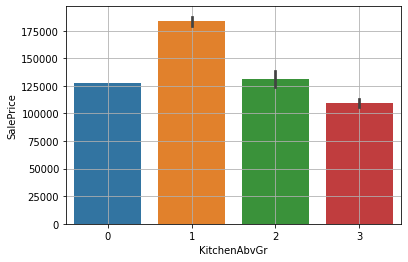

In [202]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [203]:
cols_to_drop.append(col)

#### 51. KitchenQual: Kitchen quality

In [204]:
col = "KitchenQual"
df[col].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

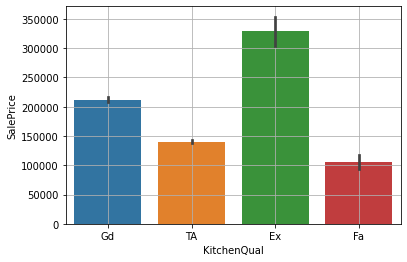

In [205]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [206]:
np.sum(df[col].isnull())

1

In [207]:
df[col] = df[col].fillna(df[col].mode()[0])
np.sum(df[col].isnull())

0

#### 52. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [208]:
col = "TotRmsAbvGrd"
df[col].value_counts()

6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
2       1
14      1
13      1
15      1
Name: TotRmsAbvGrd, dtype: int64

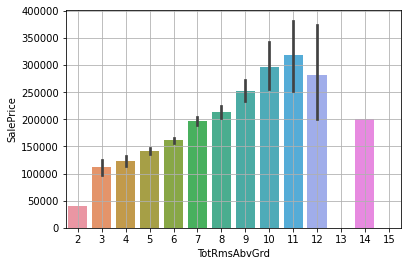

In [209]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [210]:
np.sum(df[col].isnull())

0

#### 53. Functional: Home functionality (Assume typical unless deductions are warranted)

In [211]:
col = "Functional"
df[col].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

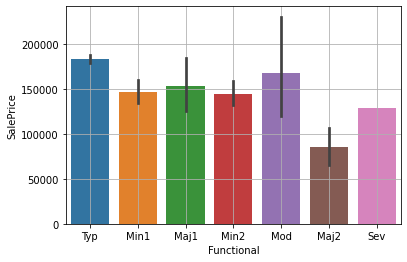

In [212]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [213]:
np.sum(df[col].isnull())

2

In [214]:
df[col] = df[col].fillna(df[col].mode()[0])
np.sum(df[col].isnull())

0

In [215]:
filter_high = df[col].isin(["Typ", "Mod"])
filter_med = df[col].isin(["Min1", "Min2", "Maj1"])
df.loc[filter_high, col] = "high"
df.loc[filter_med, col] = "med"

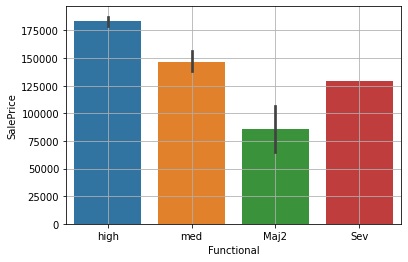

In [216]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 54. Fireplaces: Number of fireplaces

In [217]:
col = "Fireplaces"
df[col].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

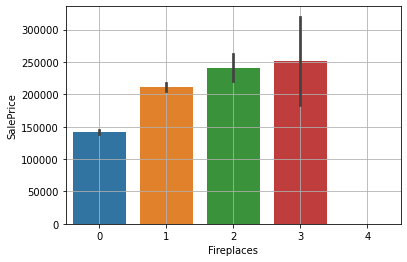

In [218]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [219]:
np.sum(df[col].isnull())

0

#### 55. FireplaceQu: Fireplace quality

In [220]:
col = "FireplaceQu"
df[col].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [221]:
np.sum(df[col].isnull())

1420

In [222]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

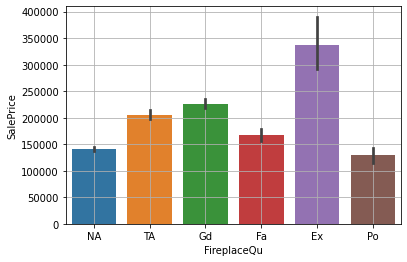

In [223]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 56. GarageType: Garage location

In [224]:
col = "GarageType"
df[col].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [225]:
np.sum(df[col].isnull())

157

In [226]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

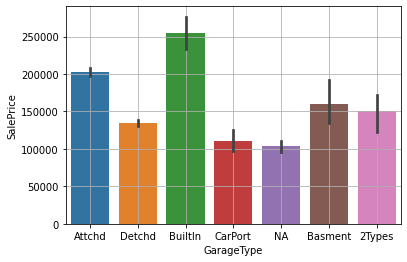

In [227]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 57. GarageYrBlt: Year garage was built

In [228]:
col = "GarageYrBlt"
df[col].corr(target)

0.48636167748786097

In [229]:
df[col].corr(df["YearBuilt"])

0.8348123731631014

In [230]:
cols_to_drop.append(col)

##### Discarded; highly correlates to existing feature

#### 58. GarageFinish: Interior finish of the garage

In [231]:
col = "GarageFinish"
df[col].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [232]:
np.sum(df[col].isnull())

159

In [233]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

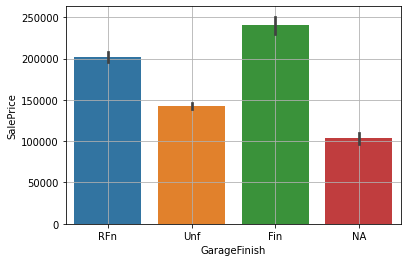

In [234]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 59. GarageCars: Size of garage in car capacity

In [235]:
col = "GarageCars"
df[col].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [236]:
np.sum(df[col].isnull())

1

In [237]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

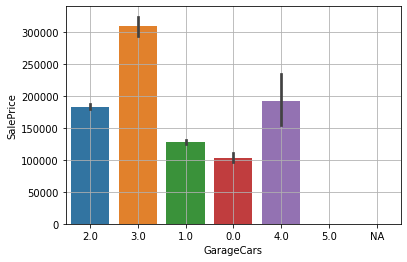

In [238]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 60. GarageArea: Size of garage in square feet

In [239]:
col = "GarageArea"
df[col].corr(target)

0.6234314389183618

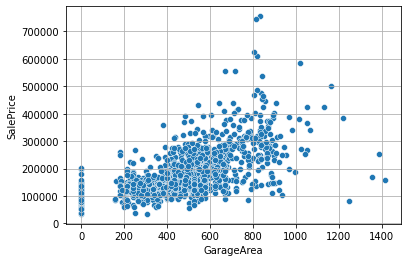

In [240]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [241]:
np.sum(df[col].isnull())

1

In [242]:
df[col] = df[col].fillna(0)
np.sum(df[col].isnull())

0

#### 61. GarageQual: Garage quality

In [243]:
col = "GarageQual"
df[col].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

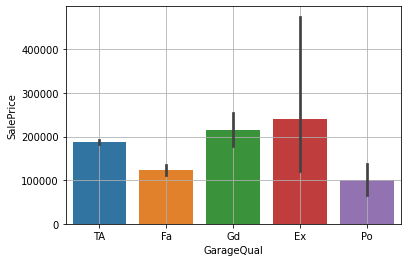

In [244]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [245]:
cols_to_drop.append(col)

##### Discarded; using garage condition instead

#### 62. GarageCond: Garage condition

In [246]:
col = "GarageCond"
df[col].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

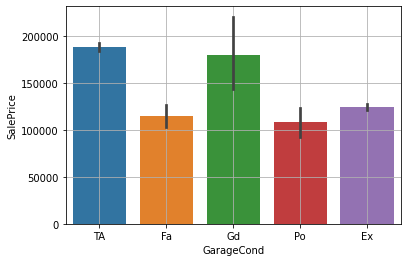

In [247]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [248]:
np.sum(df[col].isnull())

159

In [249]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

#### 63. PavedDrive: Paved driveway

In [250]:
col = "PavedDrive"
df[col].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

In [251]:
np.sum(df[col].isnull())

0

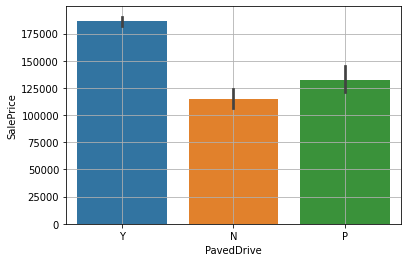

In [252]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 64. WoodDeckSF: Wood deck area in square feet

In [253]:
col = "WoodDeckSF"
df[col].corr(target)

0.3244134445681294

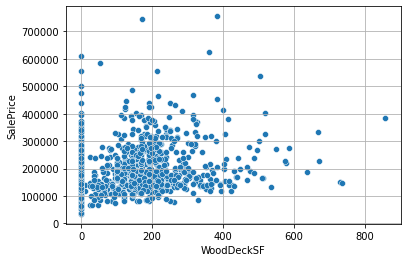

In [254]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [255]:
np.sum(df[col].isnull())

0

#### 65. OpenPorchSF: Open porch area in square feet

In [256]:
col = "OpenPorchSF"
df[col].corr(target)

0.3158562271160555

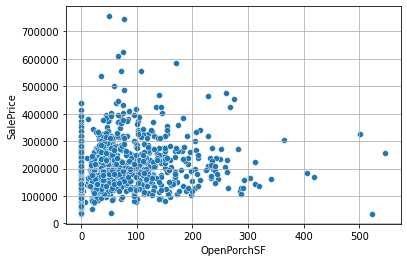

In [257]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [258]:
np.sum(df[col].isnull())

0

#### 66. EnclosedPorch: Enclosed porch area in square feet

In [259]:
col = "EnclosedPorch"
df[col].corr(target)

-0.12857795792595653

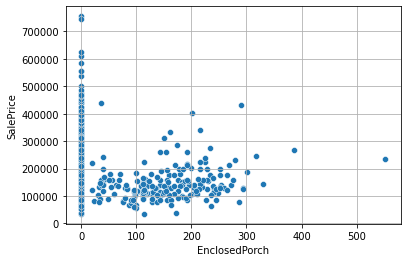

In [260]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [261]:
cols_to_drop.append(col)

#### 67. 3SsnPorch: Three season porch area in square feet

In [262]:
col = "3SsnPorch"
df[col].corr(target)

0.04458366533574846

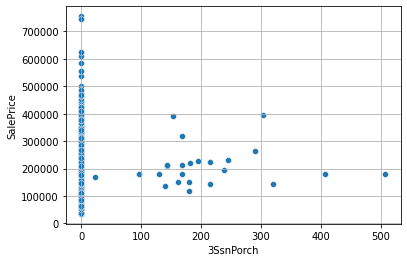

In [263]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [264]:
cols_to_drop.append(col)

#### 68. ScreenPorch: Screen porch area in square feet

In [265]:
col = "ScreenPorch"
df[col].corr(target)

0.11144657114291105

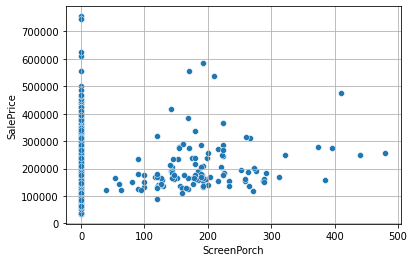

In [266]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [267]:
np.sum(df[col].isnull())

0

#### 69. PoolArea: Pool area in square feet

In [268]:
col = "PoolArea"
df[col].corr(target)

0.09240354949187321

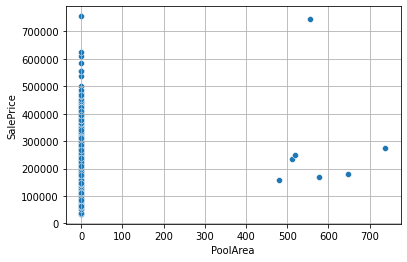

In [269]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [270]:
cols_to_drop.append(col)

##### Discarded; low correlation and skewed

#### 70. PoolQC: Pool quality

In [271]:
col = "PoolQC"
df[col].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

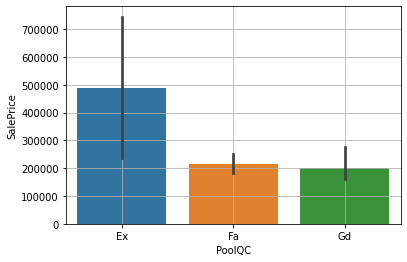

In [272]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [273]:
np.sum(df[col].isnull())

2909

In [274]:
df[col] = df[col].fillna("NA")
np.sum(df[col].isnull())

0

In [275]:
filter_pool = df[col].isin(["FA", "Gd"])
df.loc[filter_pool, col] = "pool"

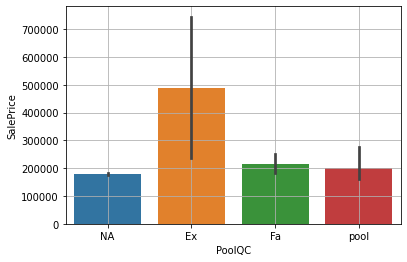

In [276]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 71. Fence: Fence quality

In [277]:
col = "Fence"
df[col].value_counts()


MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

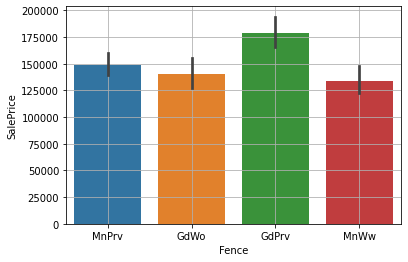

In [278]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [279]:
np.sum(df[col].isnull())

2348

0

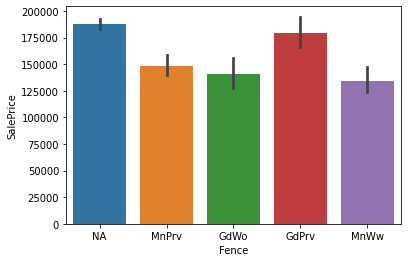

In [280]:
df[col] = df[col].fillna("NA")
sns.barplot(x=df[col], y=target)
np.sum(df[col].isnull())

#### 72. MiscFeature: Miscellaneous feature not covered in other categories

In [281]:
col = "MiscFeature"
df[col].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

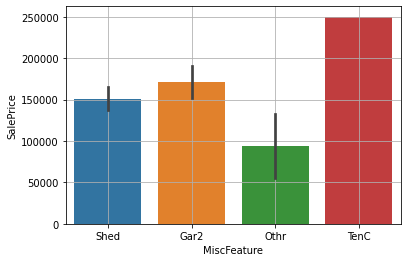

In [282]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [283]:
np.sum(df[col].isnull())

2814

In [284]:
cols_to_drop.append(col)

##### Discarded

#### 73. MiscVal: $Value of miscellaneous feature

In [285]:
col = "MiscVal"
df[col].corr(target)

-0.02118957964030325

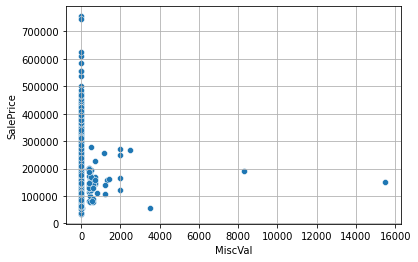

In [286]:
sns.scatterplot(x=df[col], y=target)
plt.grid()

In [287]:
np.sum(df[col].isnull())

0

#### 74. MoSold: Month Sold (MM)

In [288]:
col = "MoSold"
df[col].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

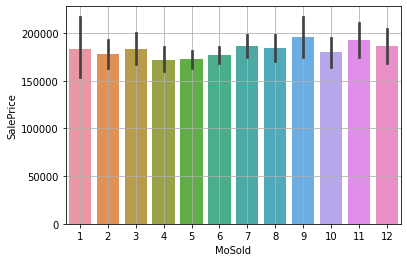

In [289]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [290]:
cols_to_drop.append(col)

##### Discarded; low correlation

#### 75. YrSold: Year Sold (YYYY)

#### 76. SaleType: Type of sale

In [291]:
col = "SaleType"
df[col].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

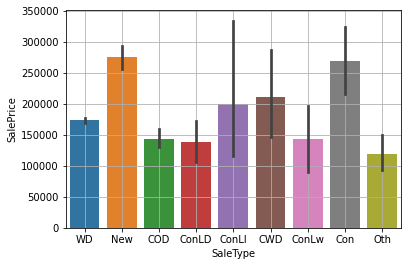

In [292]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [293]:
np.sum(df[col].isnull())

1

In [294]:
df[col] = df[col].fillna(df[col].mode()[0])
np.sum(df[col].isnull())

0

In [295]:
filter_high = df[col].isin(["New", "Con"])
filter_low = df[col].isin(["ConLD", "ConLw", "Oth", "COD"])
df.loc[filter_high, col] = "high"
df.loc[filter_low, col] = "low"

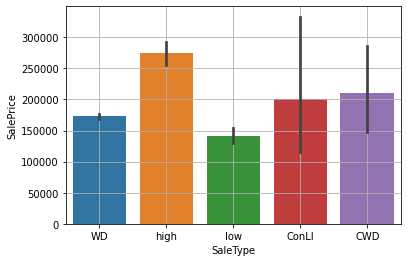

In [296]:
sns.barplot(x=df[col], y=target)
plt.grid()

#### 77. SaleCondition: Condition of sale

In [297]:
col = "SaleCondition"
df[col].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

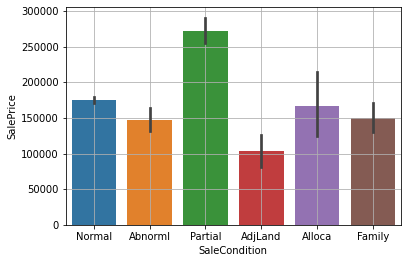

In [298]:
sns.barplot(x=df[col], y=target)
plt.grid()

In [299]:
np.sum(df[col].isnull())

0

# Drop unwanted cols

In [300]:
df.drop(cols_to_drop, axis=1, inplace=True)

# add polynomial features to numeric columns

In [301]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [302]:
poly_cols = df.select_dtypes(np.number).columns.to_list()
poly_features = poly.fit_transform(df[poly_cols])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(poly_cols)).reset_index(drop=True)
df.drop(poly_cols, axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)
df = pd.concat([df, poly_df], axis=1)

# one-hot encode

In [303]:
df_dummies = pd.get_dummies(df)

/home/du18/.env/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


# recombine with target and save

In [304]:
target.reset_index(drop=True, inplace=True)
df_dummies = pd.concat([df_dummies, target], axis=1)
df_dummies.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal,YrSold,LotFrontage^2,LotFrontage LotArea,LotFrontage YearBuilt,LotFrontage YearRemodAdd,LotFrontage MasVnrArea,LotFrontage BsmtFinSF1,LotFrontage BsmtUnfSF,LotFrontage TotalBsmtSF,LotFrontage 1stFlrSF,LotFrontage 2ndFlrSF,LotFrontage GrLivArea,LotFrontage GarageArea,LotFrontage WoodDeckSF,LotFrontage OpenPorchSF,LotFrontage ScreenPorch,LotFrontage MiscVal,LotFrontage YrSold,LotArea^2,LotArea YearBuilt,LotArea YearRemodAdd,LotArea MasVnrArea,LotArea BsmtFinSF1,LotArea BsmtUnfSF,LotArea TotalBsmtSF,LotArea 1stFlrSF,LotArea 2ndFlrSF,LotArea GrLivArea,LotArea GarageArea,LotArea WoodDeckSF,LotArea OpenPorchSF,LotArea ScreenPorch,LotArea MiscVal,LotArea YrSold,YearBuilt^2,YearBuilt YearRemodAdd,YearBuilt MasVnrArea,YearBuilt BsmtFinSF1,YearBuilt BsmtUnfSF,YearBuilt TotalBsmtSF,YearBuilt 1stFlrSF,YearBuilt 2ndFlrSF,YearBuilt GrLivArea,YearBuilt GarageArea,YearBuilt WoodDeckSF,YearBuilt OpenPorchSF,YearBuilt ScreenPorch,YearBuilt MiscVal,YearBuilt YrSold,YearRemodAdd^2,YearRemodAdd MasVnrArea,YearRemodAdd BsmtFinSF1,YearRemodAdd BsmtUnfSF,YearRemodAdd TotalBsmtSF,YearRemodAdd 1stFlrSF,YearRemodAdd 2ndFlrSF,YearRemodAdd GrLivArea,YearRemodAdd GarageArea,YearRemodAdd WoodDeckSF,YearRemodAdd OpenPorchSF,YearRemodAdd ScreenPorch,YearRemodAdd MiscVal,YearRemodAdd YrSold,MasVnrArea^2,MasVnrArea BsmtFinSF1,MasVnrArea BsmtUnfSF,MasVnrArea TotalBsmtSF,MasVnrArea 1stFlrSF,MasVnrArea 2ndFlrSF,MasVnrArea GrLivArea,MasVnrArea GarageArea,MasVnrArea WoodDeckSF,MasVnrArea OpenPorchSF,MasVnrArea ScreenPorch,MasVnrArea MiscVal,MasVnrArea YrSold,BsmtFinSF1^2,BsmtFinSF1 BsmtUnfSF,BsmtFinSF1 TotalBsmtSF,BsmtFinSF1 1stFlrSF,BsmtFinSF1 2ndFlrSF,BsmtFinSF1 GrLivArea,BsmtFinSF1 GarageArea,BsmtFinSF1 WoodDeckSF,BsmtFinSF1 OpenPorchSF,BsmtFinSF1 ScreenPorch,BsmtFinSF1 MiscVal,BsmtFinSF1 YrSold,BsmtUnfSF^2,BsmtUnfSF TotalBsmtSF,BsmtUnfSF 1stFlrSF,BsmtUnfSF 2ndFlrSF,BsmtUnfSF GrLivArea,BsmtUnfSF GarageArea,BsmtUnfSF WoodDeckSF,BsmtUnfSF OpenPorchSF,BsmtUnfSF ScreenPorch,BsmtUnfSF MiscVal,BsmtUnfSF YrSold,TotalBsmtSF^2,TotalBsmtSF 1stFlrSF,TotalBsmtSF 2ndFlrSF,TotalBsmtSF GrLivArea,TotalBsmtSF GarageArea,TotalBsmtSF WoodDeckSF,TotalBsmtSF OpenPorchSF,TotalBsmtSF ScreenPorch,TotalBsmtSF MiscVal,TotalBsmtSF YrSold,1stFlrSF^2,1stFlrSF 2ndFlrSF,1stFlrSF GrLivArea,1stFlrSF GarageArea,1stFlrSF WoodDeckSF,1stFlrSF OpenPorchSF,1stFlrSF ScreenPorch,1stFlrSF MiscVal,1stFlrSF YrSold,2ndFlrSF^2,2ndFlrSF GrLivArea,2ndFlrSF GarageArea,2ndFlrSF WoodDeckSF,2ndFlrSF OpenPorchSF,2ndFlrSF ScreenPorch,2ndFlrSF MiscVal,2ndFlrSF YrSold,GrLivArea^2,GrLivArea GarageArea,GrLivArea WoodDeckSF,GrLivArea OpenPorchSF,GrLivArea ScreenPorch,GrLivArea MiscVal,GrLivArea YrSold,GarageArea^2,GarageArea WoodDeckSF,GarageArea OpenPorchSF,GarageArea ScreenPorch,GarageArea MiscVal,GarageArea YrSold,WoodDeckSF^2,WoodDeckSF OpenPorchSF,WoodDeckSF ScreenPorch,WoodDeckSF MiscVal,WoodDeckSF YrSold,OpenPorchSF^2,OpenPorchSF ScreenPorch,OpenPorchSF MiscVal,OpenPorchSF YrSold,ScreenPorch^2,ScreenPorch MiscVal,ScreenPorch YrSold,MiscVal^2,MiscVal YrSold,YrSold^2,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_non-CullDSac,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_high,Neighborhood_low,Neighborhood_mid,Neighborhood_mid_high,Neighborhood_mid_low,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Fe

In [305]:
df_dummies.to_csv(f"data/preprocessed{suffix}.csv", index=False)
df_dummies.shape

(2919, 409)

# Score: 0.13218